# 中心极限定理证明 Central Limit Theorem

### 1.什么是中心极限定理？

通俗而言就是，大量相互独立的随机变量，其求和后的平均值以正态分布（即钟形曲线）为极限。在自然界与生产中可以解释为，一些现象受到许多相互独立的随机因素的影响，如果每个因素所产生的影响都很微小时，**总的影响可以看作是服从正态分布的**。中心极限定理就是从数学上证明了这一现象。最早的中心极限定理是讨论重点，伯努利试验中，事件A出现的次数渐近于正态分布的问题。


### 2. 独立同分布中心极限定理

设从均值为$\mu$、方差为$\sigma^2$(有限)的任意一个总体中抽取样本量为n的样本,当n充分大时,样本均值的抽样分布近似服从均值为$\mu$、方差为$\sigma^2$/n的正态分布。

步骤一：蒙特克罗模拟

In [43]:
exp <- c() # 用于存放实验数据
n <- 10000 # 实验次数

# 下面模拟投硬币的实验
for(i in 1:n){
  data <- rbinom(n, 1, 0.5)  # 二项分布
  exp[i] <- (sum(data)-n*0.5)/(sqrt(n*0.25))  # 均值为0.5，方差为0.25
}

步骤二：绘图直观观察

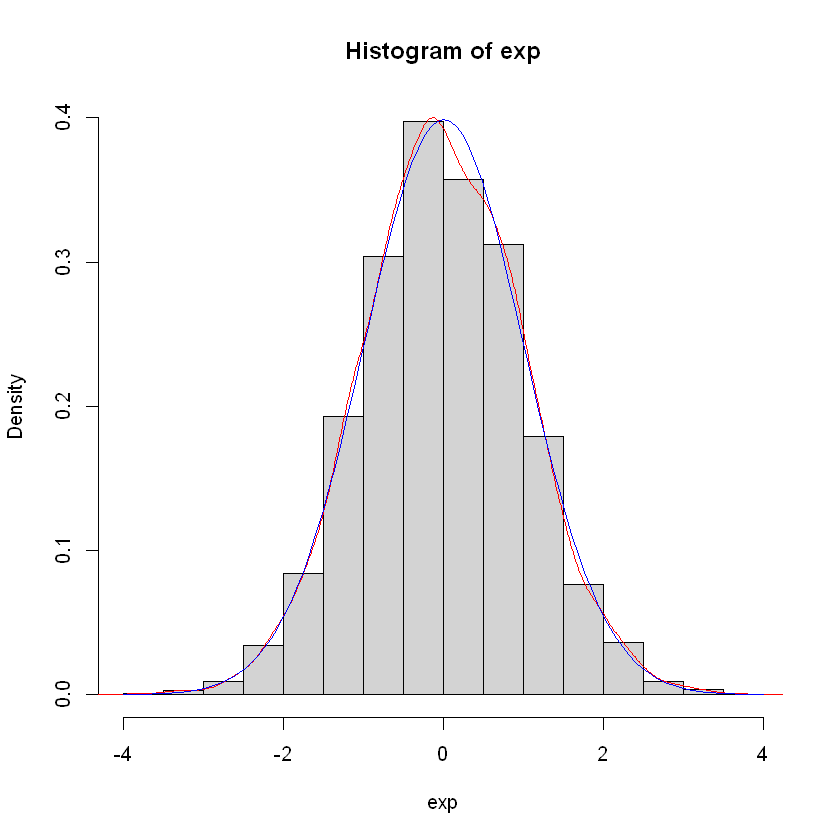

In [44]:
hist(exp, freq = F) #概率密度直方图
lines(density(exp), col='red') # 随机数的密度曲线
x <- rnorm(10000)
curve(dnorm(x),add = T,col='blue') #正态分布曲线

步骤三：绘制QQ图进行检验

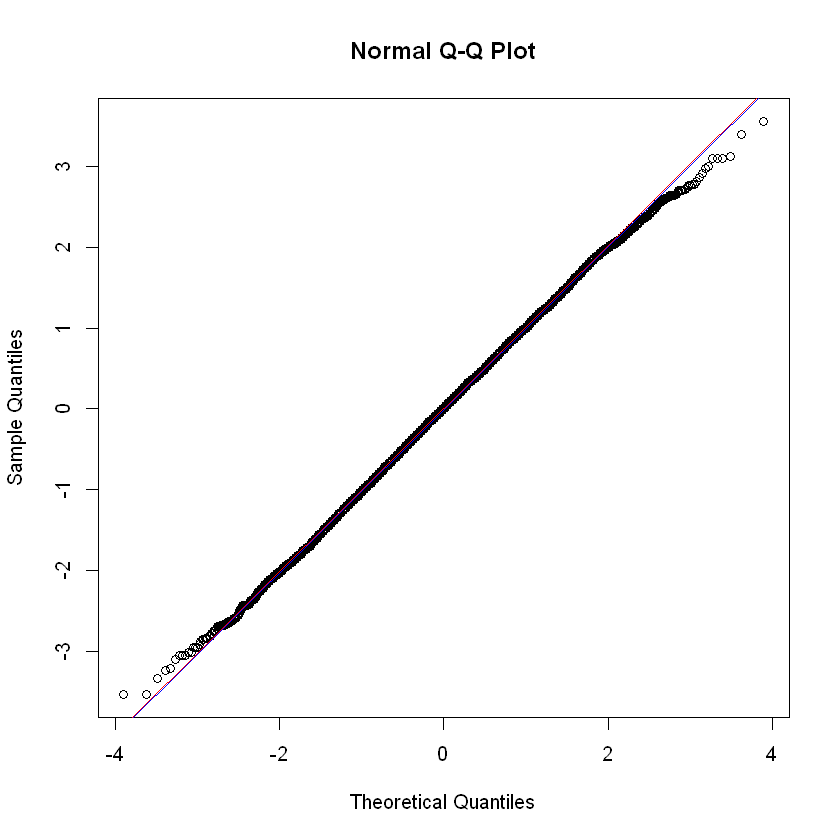

In [25]:
qqnorm(exp)
qqline(exp, col = "red")
qqline(x, col = "blue") # 正态分布的

步骤四：计算偏态系数和峰态系数

峰度（kurtosis）表示分布的尖锐程度。正态分布的峰度为3，>3说明峰比正态分布的尖，<3说明峰比正态分布的平坦。

偏度（skewness）表示分布的偏离对称的程度。正态分布的偏度为0，偏度>0为右偏， 众数 < 中位数 < 算术平均值；偏度<0 为左偏，算术平均值 < 中位数 < 众数。

summary statistics
------
min:  -3.54   max:  3.56 
median:  0 
mean:  -0.001914 
estimated sd:  1.009252 
estimated skewness:  -0.04623579 
estimated kurtosis:  2.85915 

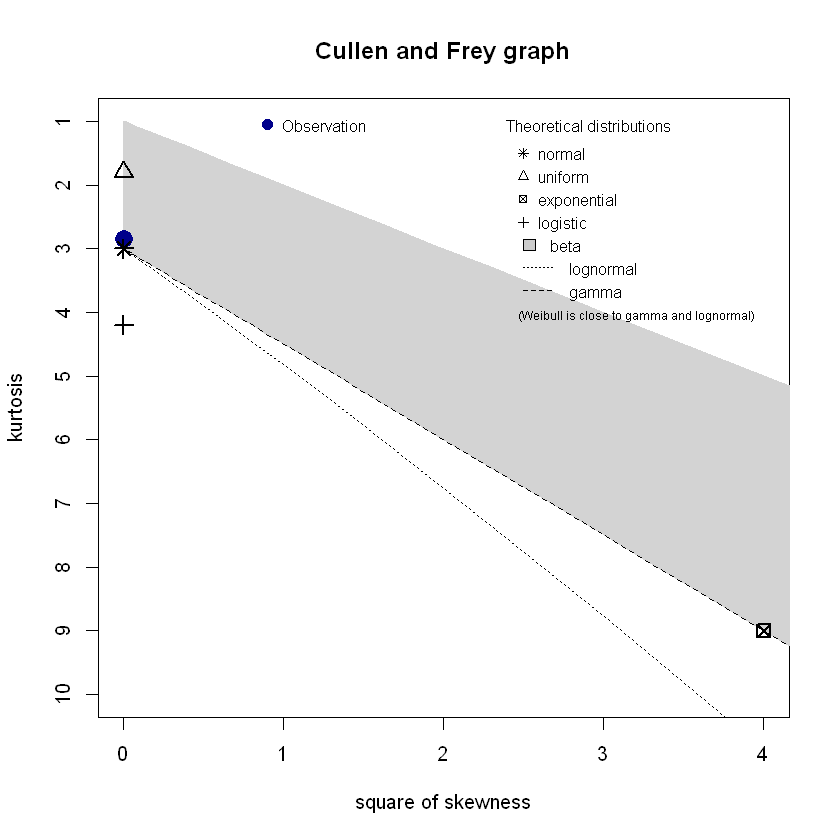

In [24]:
library(fitdistrplus)
descdist(exp)

步骤五：体会大样本的前提条件

In [46]:
clt <- function(n){
  exp <- c() # 用于存放实验数据

  # 下面模拟投硬币的实验
  for(i in 1:n){
    data <- rbinom(n, 1, 0.5)  # 二项分布
    exp[i] <- (sum(data)-n*0.5)/(sqrt(n*0.25))  # 均值为0.5，方差为0.25
  }

  hist(exp, freq = F) #概率密度直方图
  lines(density(exp), col='red') # 随机数的密度曲线
  x <- rnorm(10000)
  curve(dnorm(x),add = T,col='blue') #正态分布曲线

  qqnorm(exp)
  qqline(exp, col = "red")
  qqline(x, col = "blue") # 正态分布的

  descdist(exp)
}

做100次

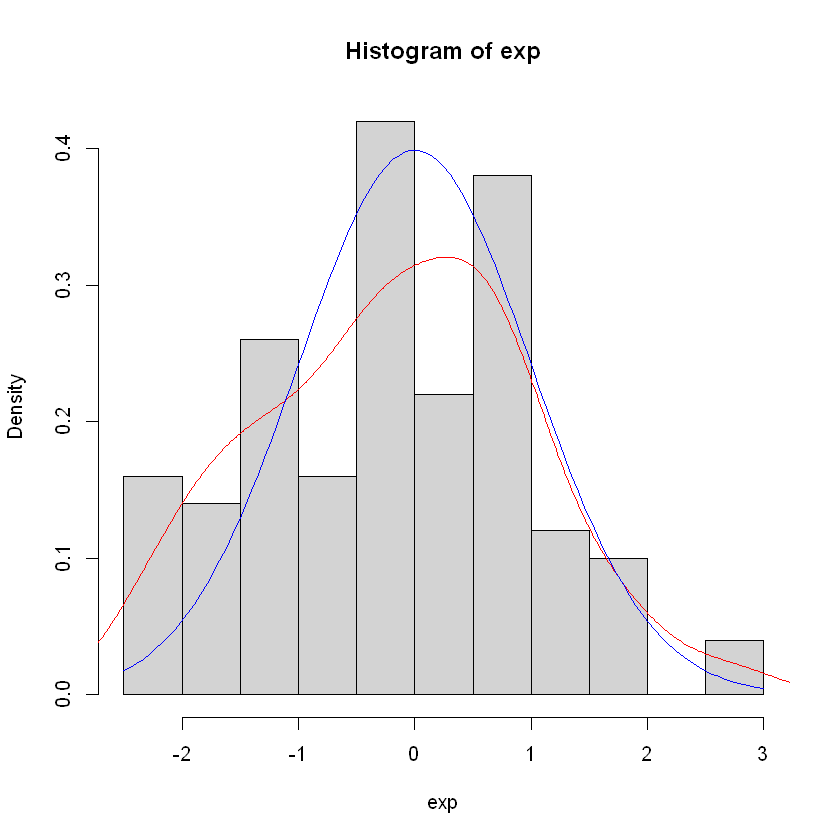

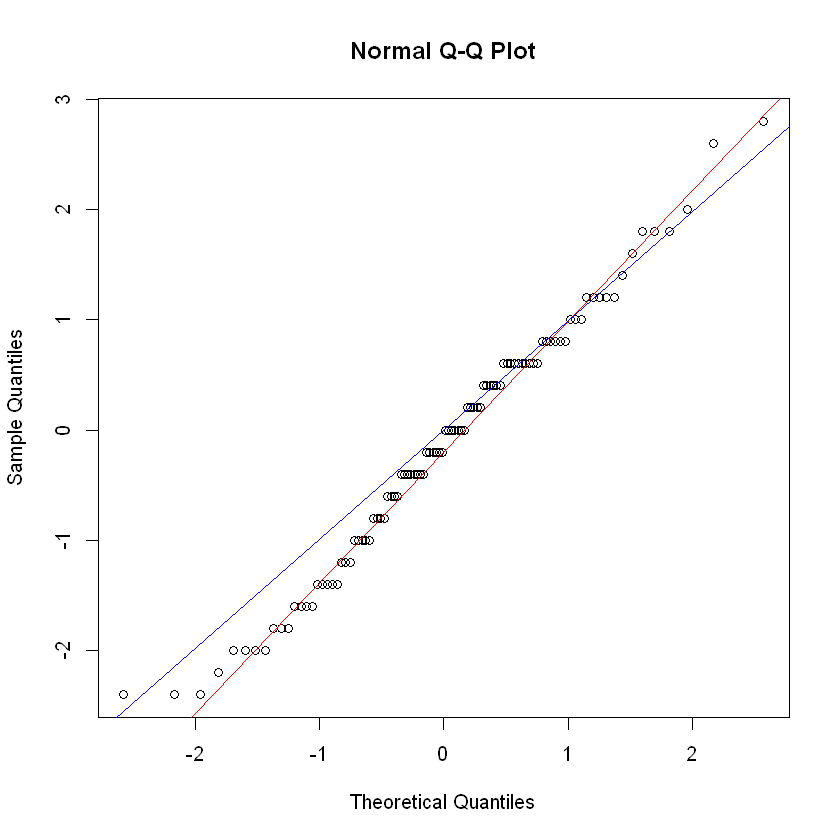

summary statistics
------
min:  -2.4   max:  2.8 
median:  -0.1 
mean:  -0.158 
estimated sd:  1.154104 
estimated skewness:  0.04480187 
estimated kurtosis:  2.594081 

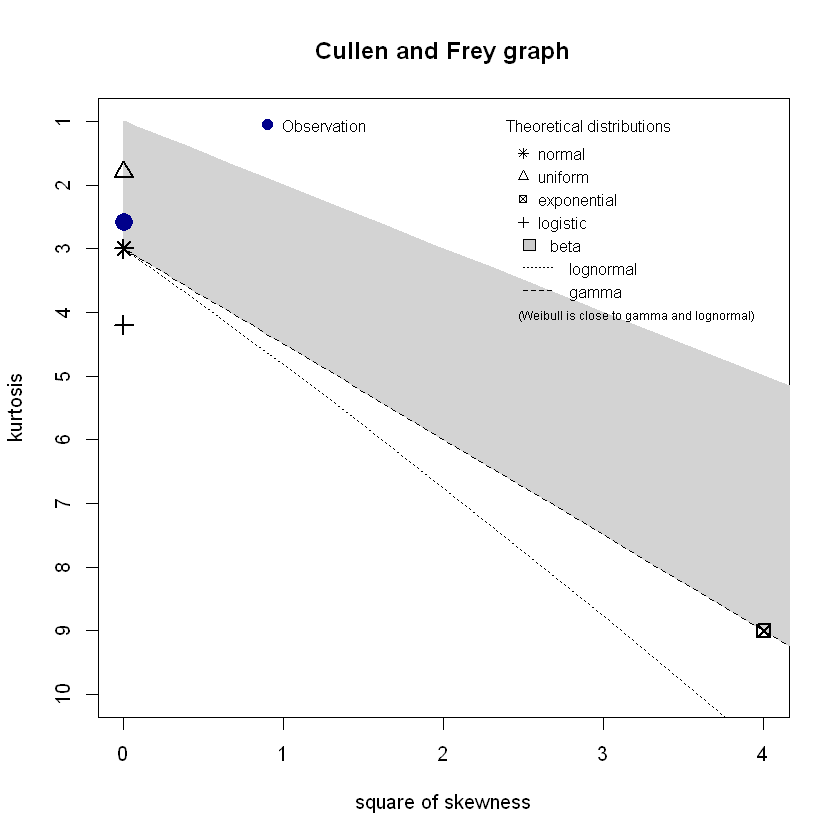

In [53]:
clt(100)

做1000次

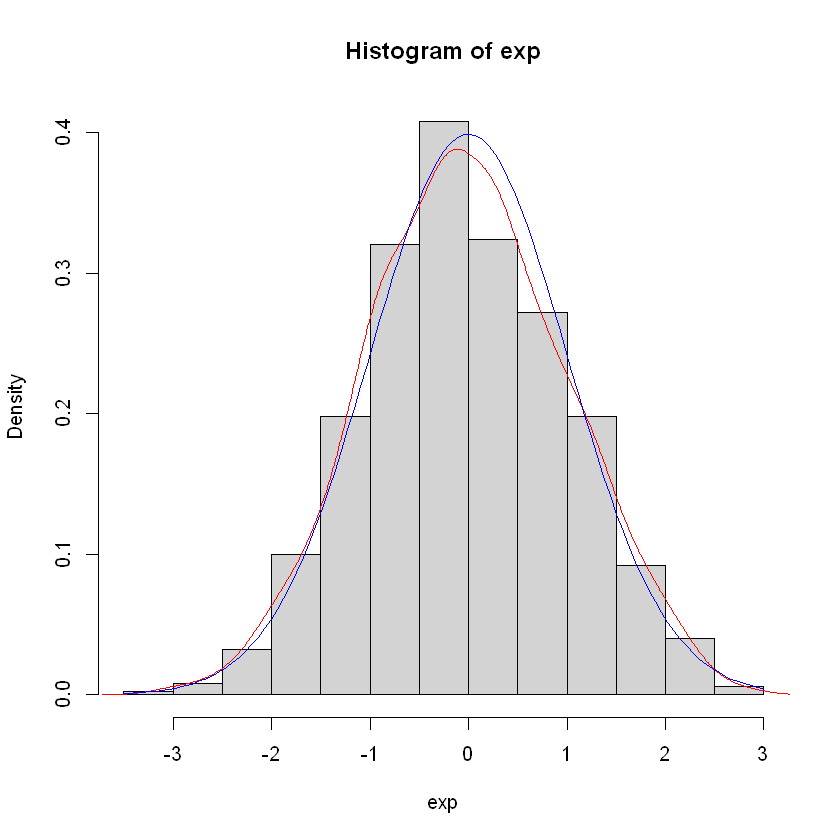

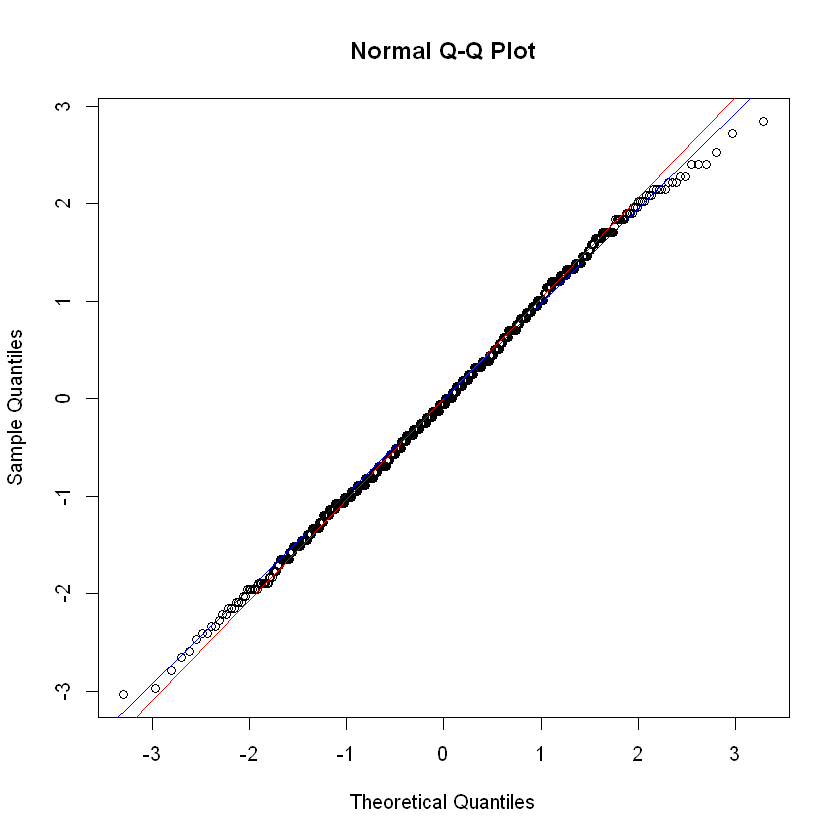

summary statistics
------
min:  -3.035787   max:  2.84605 
median:  -0.06324555 
mean:  -0.02144024 
estimated sd:  1.002316 
estimated skewness:  0.02514174 
estimated kurtosis:  2.761781 

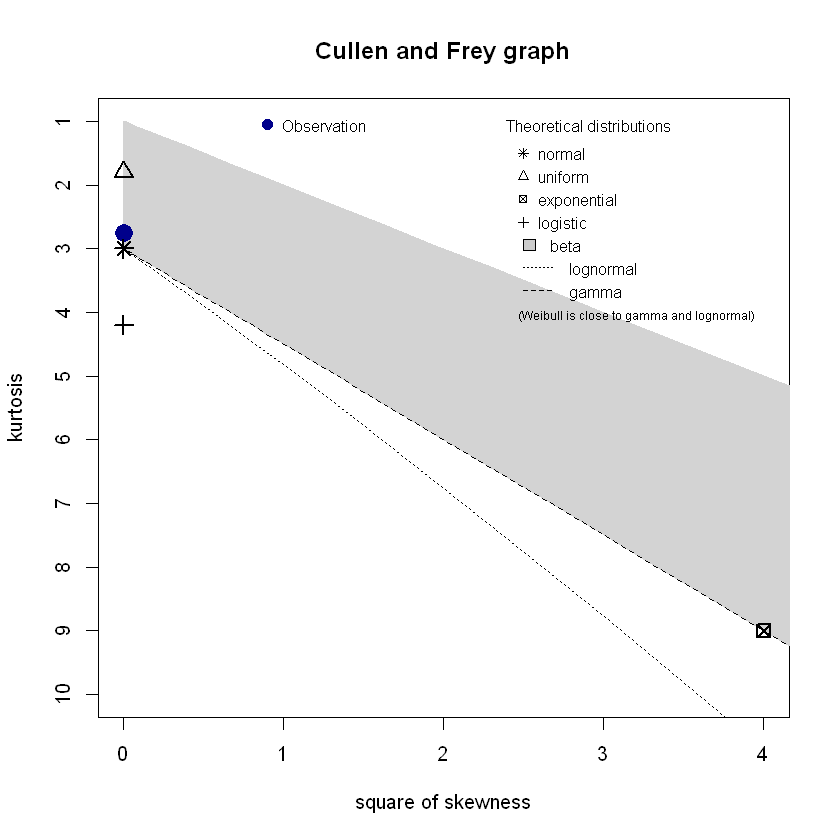

In [57]:
clt(1000)

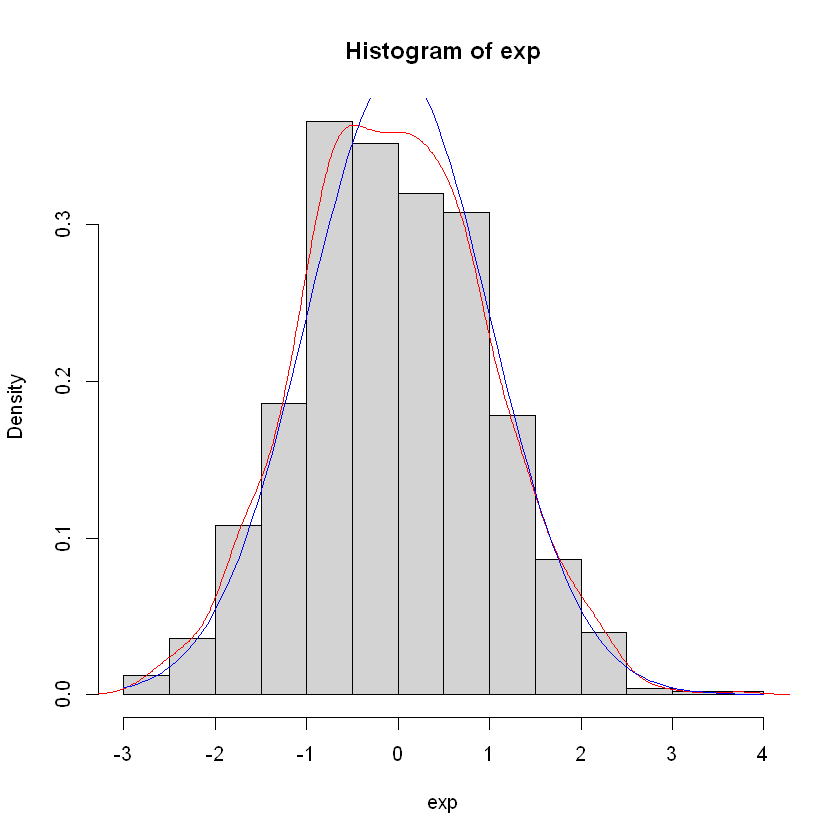

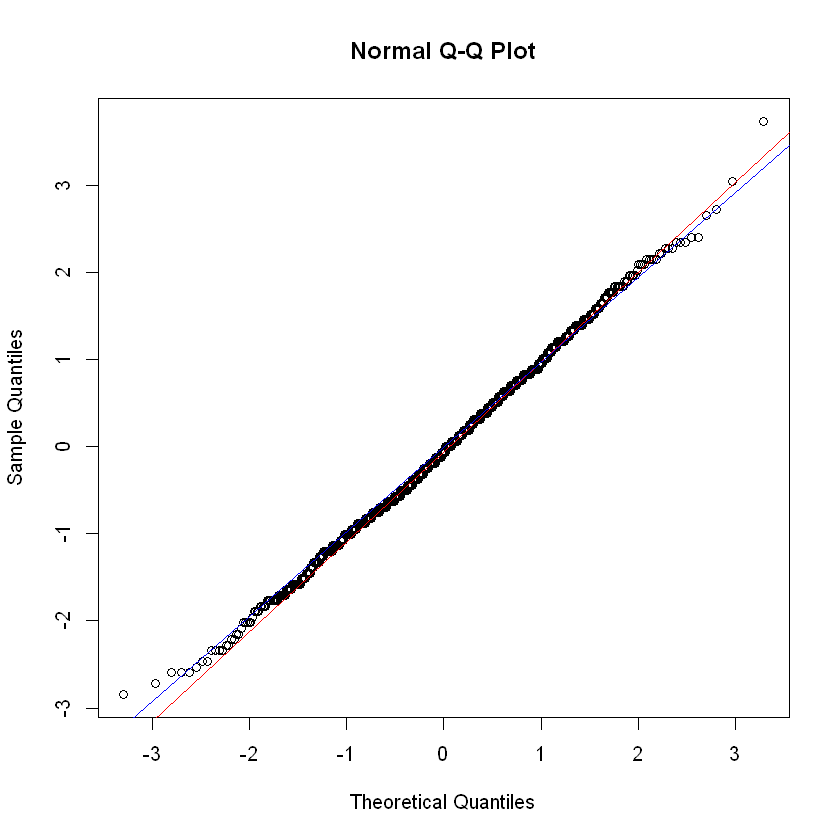

summary statistics
------
min:  -2.84605   max:  3.731488 
median:  -0.06324555 
mean:  -0.0369354 
estimated sd:  1.009633 
estimated skewness:  0.09834295 
estimated kurtosis:  2.891365 

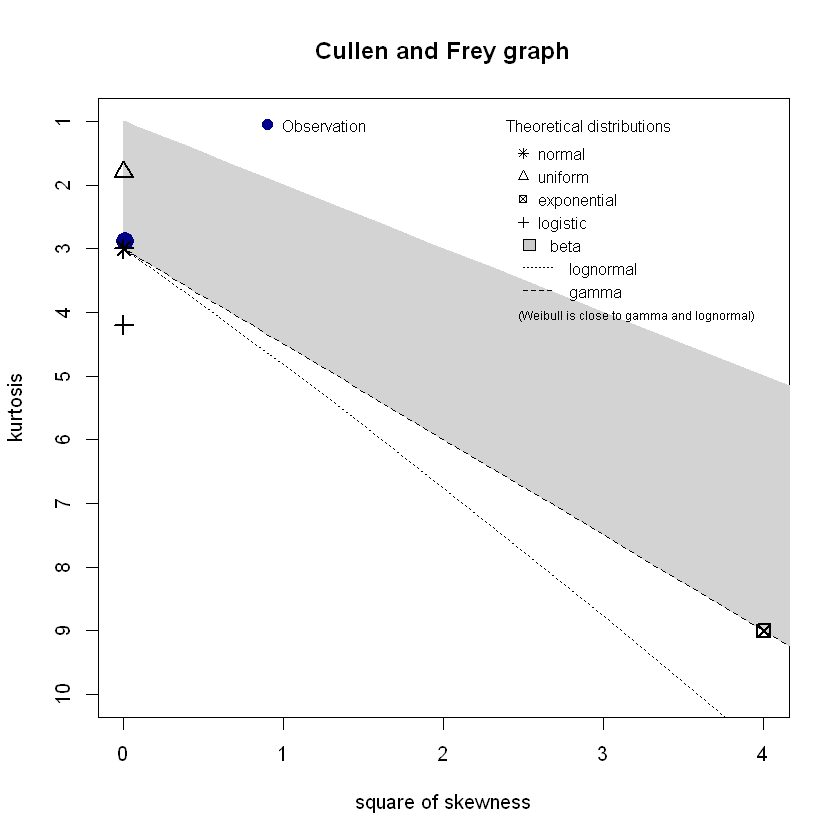

In [56]:
clt(1000)

步骤六：证明对于不同的分布同样适用（连续型）

In [25]:
exp <- c() # 用于存放实验数据
n <- 10000

# 使用均匀分布
a <- -4;b <- 4
u <- (a+b)/2
sd <- (b-a)^2/12 # 定义期望和方差

for(i in 1:n){
  data <- runif(n,min=a,max=b) 
  exp[i] <- (sum(data)-n*u)/(sqrt(n*sd))  
}

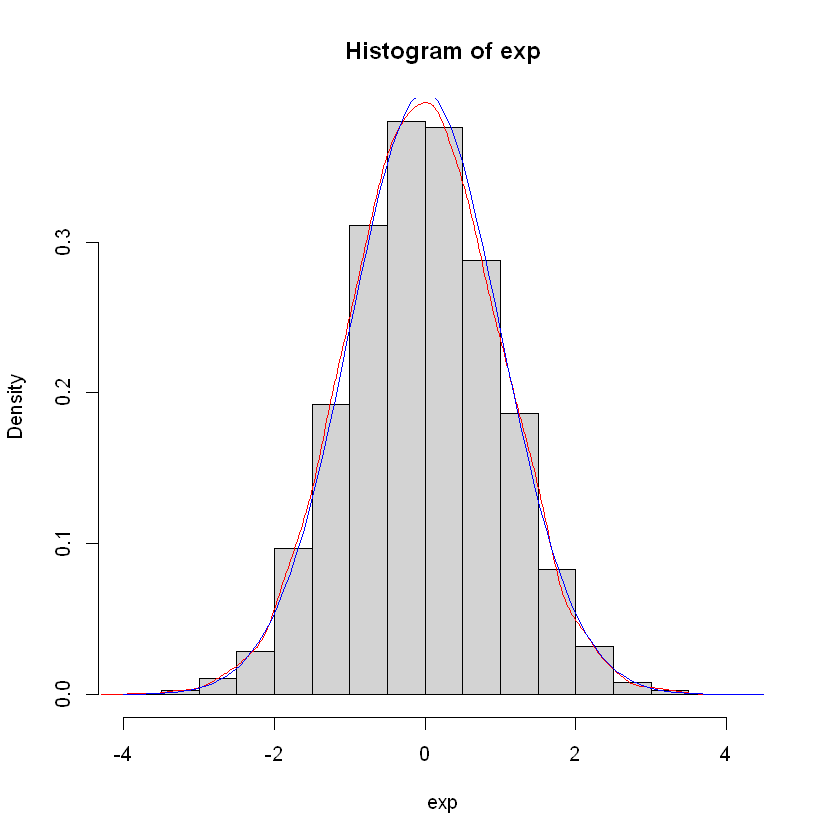

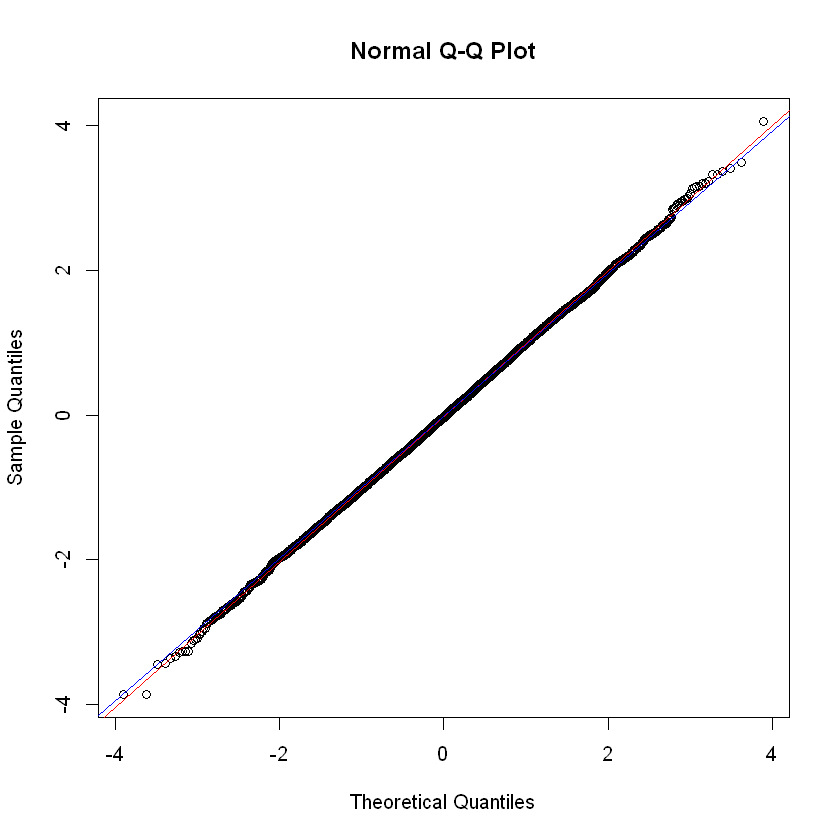

summary statistics
------
min:  -3.867463   max:  4.06117 
median:  -0.0307916 
mean:  -0.02446853 
estimated sd:  1.000645 
estimated skewness:  0.008312031 
estimated kurtosis:  2.994692 

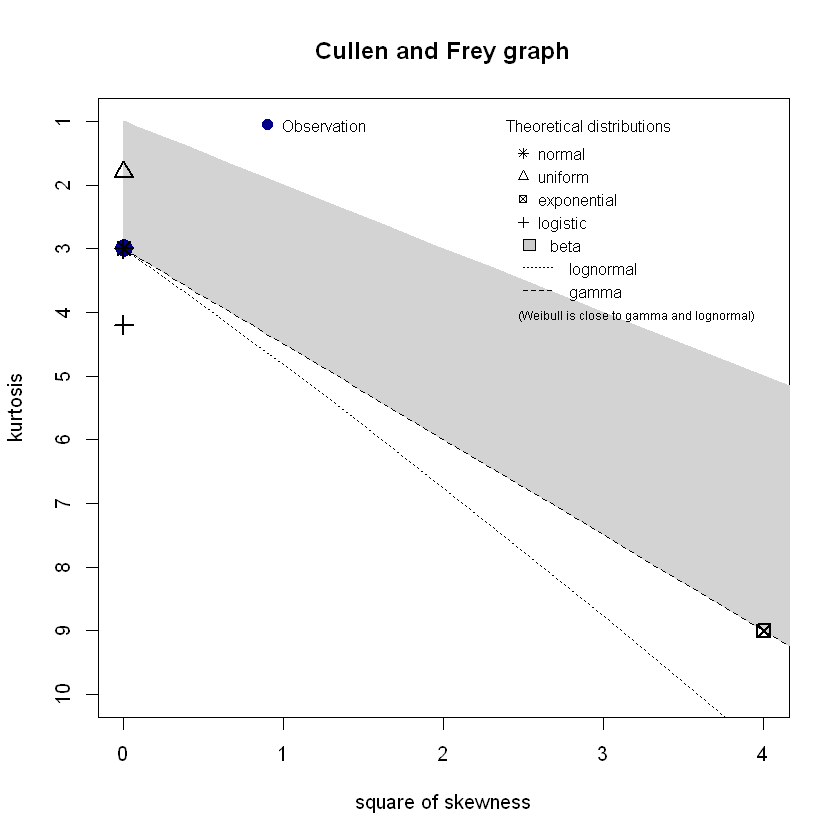

In [26]:
clt1 <- function(exp){
  hist(exp, freq = F) #概率密度直方图
  lines(density(exp), col='red') # 随机数的密度曲线
  x <- rnorm(10000)
  curve(dnorm(x),add = T,col='blue') #正态分布曲线

  qqnorm(exp)
  qqline(exp, col = "red")
  qqline(x, col = "blue") # 正态分布的

  descdist(exp)
}

clt1(exp)

# 练习经验分布

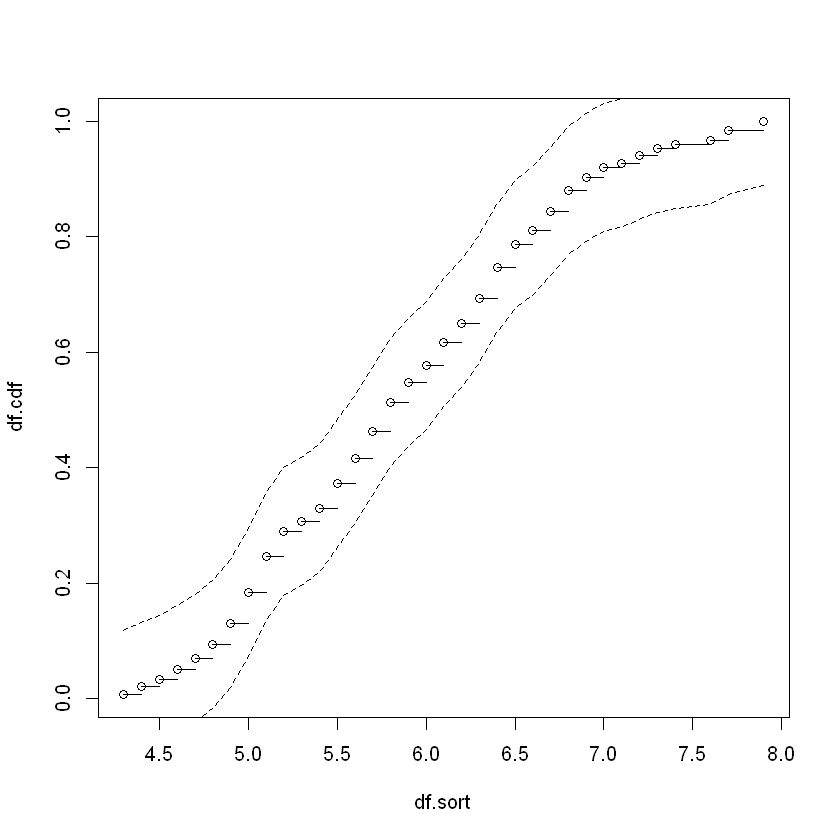

In [4]:
data(iris)
df = iris[,1]  #导入数据
df.sort = sort(df)
df.rank = rank(df.sort) 
df.cdf = df.rank/length(df)
plot(df.sort,df.cdf)
N = length(df)
segments(df.sort[1:(N-1)],df.cdf[1:(N-1)] , df.sort[2:N],df.cdf[1:(N-1)])

alpha = 0.05
band = sqrt(1/(2*length(df))*log(2/alpha))
lower.95 = df.cdf-band
upper.95 = df.cdf+band
lines(df.sort,lower.95,lty=2)
lines(df.sort,upper.95,lty=2)

In [55]:
rfdata<- read.csv(file = "wufenghua.csv",header = T, stringsAsFactors=TRUE,sep=",",encoding = 'UTF-8') 
x = rfdata[,-which(names(rfdata)%in%c("X.U.FEFF.编号","类型"))]
y = rfdata[ , c("类型")]
n = ncol(x)
library(e1071)
survivingFeaturesIndexes = seq(1:n)
featureRankedList = vector(length=n)
rankedFeatureIndex = n

In [ ]:
svmModel = svm(as.matrix(x[, survivingFeaturesIndexes]), y, C = 10, cache_size=500,kernel="linear" )
while(length(survivingFeaturesIndexes)>0){
#train the support vector machine


#compute ranking criteria
rankingCriteria = svmModel$w * svmModel$w

#rank the features
ranking = sort(rankingCriteria, index.return = TRUE)$ix

#update feature ranked list
featureRankedList[rankedFeatureIndex] = survivingFeaturesIndexes[ranking[1]]
rankedFeatureIndex = rankedFeatureIndex - 1

#eliminate the feature with smallest ranking criterion
(survivingFeaturesIndexes = survivingFeaturesIndexes[-ranking[1]])

}

: 

: 

In [ ]:
print(featureRankedList)

In [ ]:
x

# 练习中位数

In [14]:
# 生成100个随机数

exp <- c() # 用于存放实验数据
n <- 1000 # 实验次数

# 下面模拟投硬币的实验
for(i in 1:n){
  data <- rbinom(n, 1, 0.5)  # 二项分布
  exp[i] <- (sum(data)-n*0.5)/(sqrt(n*0.25))  # 均值为0.5，方差为0.25
}

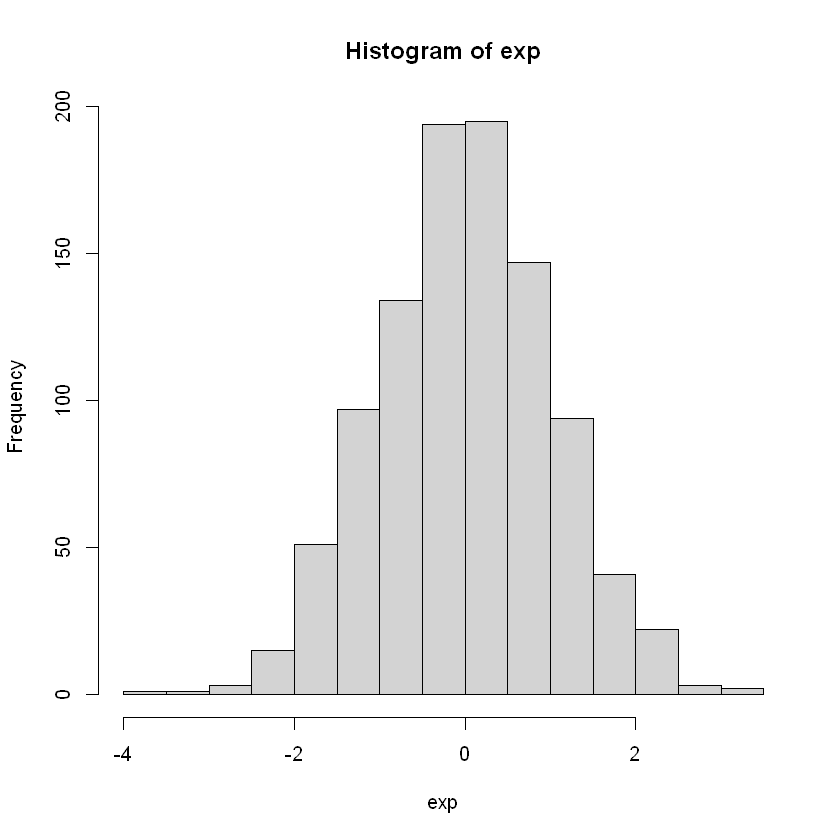

In [15]:
hist(exp)

In [16]:
# 求指定位置的分位数
data.frame(quantile(exp,c(0.9,0.75,0.5,0.25,0.1)))

,quantile.exp..c.0.9..0.75..0.5..0.25..0.1..
,<dbl>
90%,1.27123562
75%,0.69570109
50%,0.06324555
25%,-0.69570109
10%,-1.26491106


In [ ]:
sort = sort(exp)
print(sort)

In [19]:
sample(exp, 10, replace = FALSE, prob = NULL)

[1] -0.6324555  0.1264911  1.0119289 -1.7708755 -0.4427189 -2.1503488
 [7]  1.0119289 -0.1264911  0.3794733 -0.4427189

In [24]:
x = rnorm(100,10,10)
y1 = sum(x>17)
y2 = sum(x<=17)
print(c(y1,y2))